#Task-1   Stock Prediction using LSTM (MSFT Dataset)
#link of the dataset:https://finance.yahoo.com/quote/MSFT/history/?guccounter=1&guce_referrer=aHR0cHM6Ly9jb2xhYi5yZXNlYXJjaC5nb29nbGUuY29tLw&guce_referrer_sig=AQAAAJ56Yu6SXOWfS_MlKdHczxn5roh_Hn3h1AbILOwmetacsF4g2hxCnEVdgqQAtpcvpbcsZeRFdynHgeC7-wiZ9GGtIJPrWYBVkcI3ljzj3e_O0KfTQYFkXs2O6j9XXfx-NzwXtuVKzJSIXy3ZpL8GlIM9_LQAMZNjyfBvhNW_zSsR 

In [1]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9478,2023-10-20,331.720001,331.920013,325.450012,326.670013,326.670013,25012600
9479,2023-10-23,325.470001,332.730011,324.390015,329.320007,329.320007,24374700
9480,2023-10-24,331.299988,331.839996,327.600006,330.529999,330.529999,31153600
9481,2023-10-25,345.019989,346.200012,337.619995,340.670013,340.670013,55053800


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9478,2023-10-20,326.670013
9479,2023-10-23,329.320007
9480,2023-10-24,330.529999
9481,2023-10-25,340.670013


In [3]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [4]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9478,2023-10-20,326.670013
9479,2023-10-23,329.320007
9480,2023-10-24,330.529999
9481,2023-10-25,340.670013


In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\neha\AppData\Local\Temp\ipykernel_59836\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9478   2023-10-20
9479   2023-10-23
9480   2023-10-24
9481   2023-10-25
9482   2023-10-26
Name: Date, Length: 9483, dtype: datetime64[ns]

In [6]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-10-20,326.670013
2023-10-23,329.320007
2023-10-24,330.529999


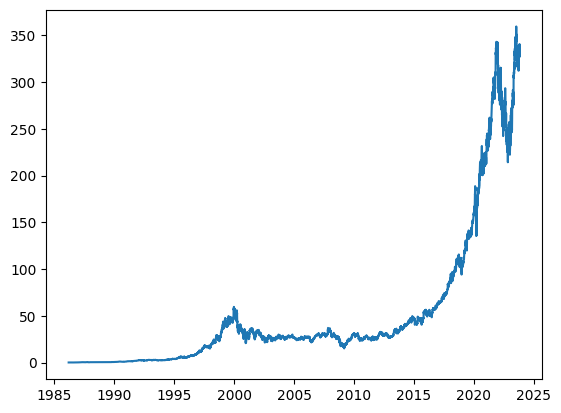

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-02-25', 
                                '2023-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-02-25,287.720001,280.269989,294.589996,297.309998
1,2022-02-28,280.269989,294.589996,297.309998,298.790009
2,2022-03-01,294.589996,297.309998,298.790009,294.950012
3,2022-03-02,297.309998,298.790009,294.950012,300.190002
4,2022-03-03,298.790009,294.950012,300.190002,295.920013
...,...,...,...,...,...
265,2023-03-17,260.790009,265.440002,276.200012,279.429993
266,2023-03-20,265.440002,276.200012,279.429993,272.230011
267,2023-03-21,276.200012,279.429993,272.230011,273.779999
268,2023-03-22,279.429993,272.230011,273.779999,272.290009


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((270,), (270, 3, 1), (270,))

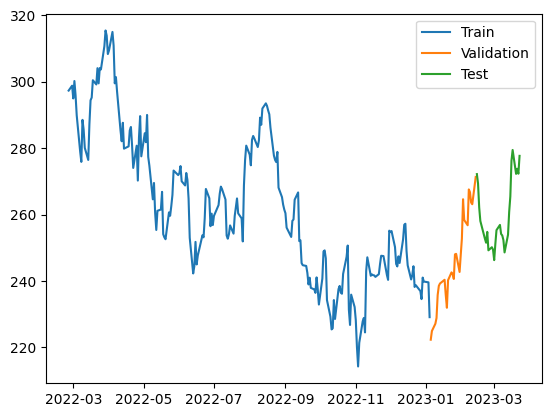

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 121ms/step - loss: 69033.9922 - mean_absolute_error: 261.7811 - val_loss: 60100.9531 - val_mean_absolute_error: 244.7688
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 68615.0859 - mean_absolute_error: 260.9778 - val_loss: 59650.0938 - val_mean_absolute_error: 243.8463
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 68078.8359 - mean_absolute_error: 259.9508 - val_loss: 59101.0000 - val_mean_absolute_error: 242.7177
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 67460.3125 - mean_absolute_error: 258.7563 - val_loss: 58430.6055 - val_mean_absolute_error: 241.3321
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 66635.6797 - mean_absolute_error: 257.1537 - val_loss: 57494.9023 - val_mean_absolute_error: 239.3859
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 65542.7109 - mean_absolute_error: 255.0224 - val_loss: 56

7/7 [==============================] - 2s 5ms/step


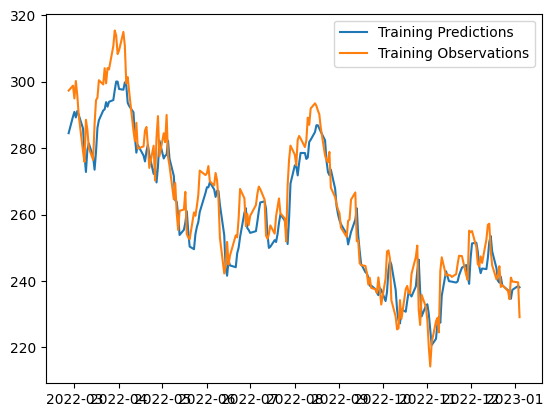

In [14]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 25ms/step


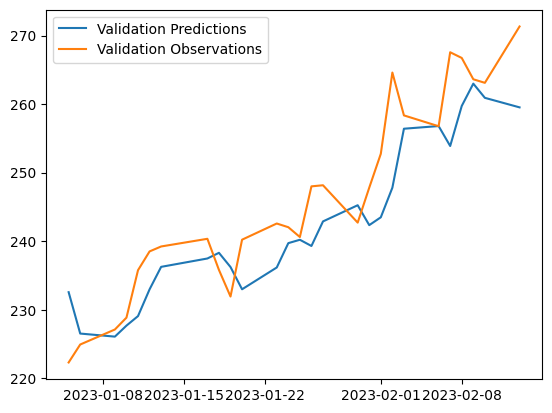

In [15]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


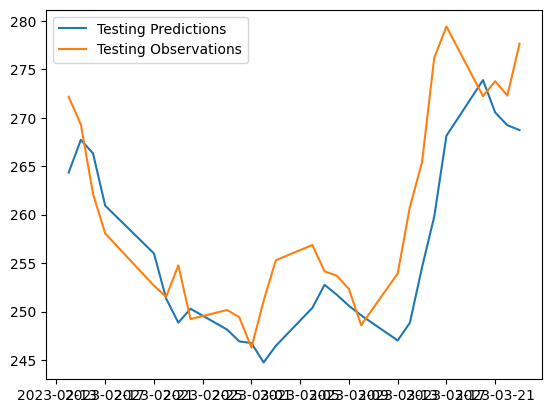

In [16]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

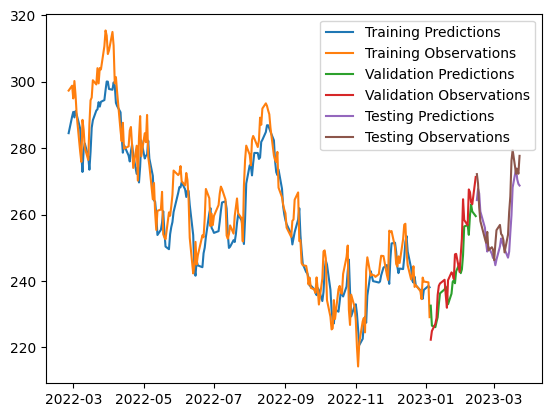

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [18]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 24ms/step


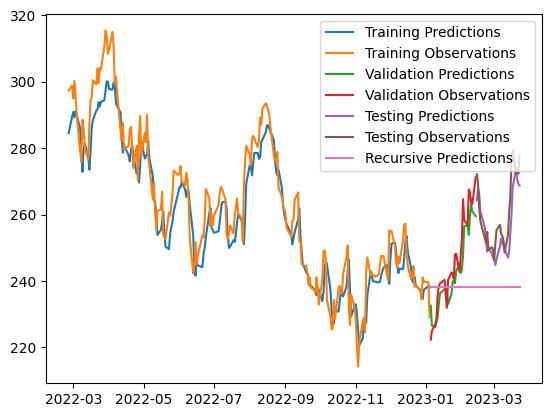

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])